<a href="https://colab.research.google.com/github/sky9825/MNIST_Deployment/blob/main/assign_week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.preprocessing import LabelEncoder
import numpy as np

# --- 1. Load Data ---
print("--- 1. Data Loading ---")
# Load the Iris dataset, which is conveniently packaged with Scikit-learn
iris = load_iris()
# Create a DataFrame for easier handling
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target
target_names = iris.target_names

print(f"Features (X) shape: {X.shape}")
print(f"Target (y) shape: {y.shape}")
print(f"Target Species: {target_names}")
# Display the first few rows of the data
print("\nFirst 5 rows of features:")
print(X.head())

print("-" * 50)

# --- 2. Preprocessing the Data ---
print("--- 2. Data Preprocessing ---")

# a) Handling Missing Values:
# The standard Scikit-learn Iris dataset is clean and has no missing values.
# However, this block demonstrates how one *would* check and handle them.
print(f"Number of missing values per feature:\n{X.isnull().sum()}")
# If there were missing values, a common strategy would be:
# X = X.fillna(X.mean()) # For numerical features

# b) Label Encoding (Target Variable):
# The target variable 'y' is already numerically encoded (0, 1, 2), which is
# suitable for Scikit-learn. If it were string labels (e.g., 'setosa'), we'd use LabelEncoder.
# Demonstrating LabelEncoder for completeness:
# le = LabelEncoder()
# y_encoded = le.fit_transform(y_string_labels) # Use y_encoded for training

print("Target variable is already encoded (0, 1, 2) and ready for training.")

print("-" * 50)

# --- 3. Splitting the Data ---
print("--- 3. Data Splitting ---")
# Split the dataset into training and testing sets (80% train, 20% test)
# 'random_state' ensures reproducibility
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train distribution: {np.bincount(y_train)}")
print(f"y_test distribution: {np.bincount(y_test)}")

print("-" * 50)

# --- 4. Training the Decision Tree Classifier ---
print("--- 4. Model Training (Decision Tree) ---")
# Initialize the Decision Tree Classifier
# 'criterion' can be 'gini' (default) or 'entropy'
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the model on the training data
dt_classifier.fit(X_train, y_train)

print("Decision Tree Classifier trained successfully.")

print("-" * 50)

# --- 5. Prediction and Evaluation ---
print("--- 5. Prediction and Evaluation ---")
# Make predictions on the test set
y_pred = dt_classifier.predict(X_test)

# Calculate Evaluation Metrics
# The 'average' parameter is crucial for multi-class classification:
# 'macro': Calculate metric for each class and find their unweighted mean.
# 'weighted': Calculate metric for each class and find their mean weighted by support (number of true instances for each label).
# 'micro': Global calculation, counting total true positives, false negatives, and false positives.

# 1. Accuracy: Overall correctness of the model
accuracy = accuracy_score(y_test, y_pred)

# 2. Precision: Ability of the classifier not to label as positive a sample that is negative
# Use 'weighted' to account for class imbalance (though minor here)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)

# 3. Recall: Ability of the classifier to find all the positive samples
# Use 'weighted'
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)

# --- Display Results ---
print("\n--- Model Evaluation Results ---")
print(f"Accuracy: {accuracy:.4f} (Overall correctness)")
print(f"Precision: {precision:.4f} (Weighted ability to avoid false positives)")
print(f"Recall: {recall:.4f} (Weighted ability to find all positive samples)")
print("------------------------------")

--- 1. Data Loading ---
Features (X) shape: (150, 4)
Target (y) shape: (150,)
Target Species: ['setosa' 'versicolor' 'virginica']

First 5 rows of features:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
--------------------------------------------------
--- 2. Data Preprocessing ---
Number of missing values per feature:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64
Target variable is already encoded (0, 1, 2) and ready for training.
--------------------------------------------------
--- 3. Data Splitting ---
X_train shape: (1

--- 1. Data Loading and Preprocessing ---
11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Original Training Features Shape: (60000, 28, 28)
Original Testing Features Shape: (10000, 28, 28)
Reshaped Training Features Shape: (60000, 28, 28, 1)
One-Hot Encoded Target Shape: (60000, 10)
--------------------------------------------------
--- 2. Building the CNN Model ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

--------------------------------------------------
--- 3. Training the Model ---
Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 55s 124ms/step - accuracy: 0.8233 - loss: 0.5796 - val_accuracy: 0.9837 - val_loss: 0.0610
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 73s 102ms/step - accuracy: 0.9705 - loss: 0.0933 - val_accuracy: 0.9862 - val_loss: 0.0450
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 43s 102ms/step - accuracy: 0.9790 - loss: 0.0655 - val_accuracy: 0.9892 - val_loss: 0.0374
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 42s 99ms/step - accuracy: 0.9821 - loss: 0.0576 - val_accuracy: 0.9897 - val_loss: 0.0363
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 42s 99ms/step - accuracy: 0.9860 - loss: 0.0438 - val_accuracy: 0.9918 - val_loss: 0.0305
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 82s 99ms/step - accuracy: 0.9882 - loss: 0.0372 - val_accuracy: 0.9917 - val_loss: 0.0313
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 42s 99ms/step - accuracy: 0.9886 - loss: 0.0345 - val_accuracy: 0.9908 - val_loss: 0.0325
Epoch 

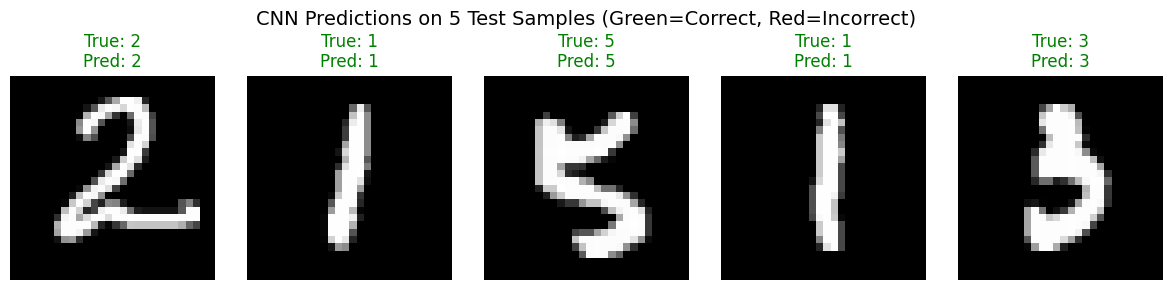


--- 6. Saving the Model ---
Model successfully saved as 'mnist_cnn_model.h5'


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

# Set a random seed for reproducibility
tf.random.set_seed(42)

print("--- 1. Data Loading and Preprocessing ---")

# Load the MNIST dataset
# The data is already split into training and testing sets
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

# Check data shapes
print(f"Original Training Features Shape: {X_train.shape}")
print(f"Original Testing Features Shape: {X_test.shape}")

# Preprocessing Steps:

# a) Reshape: CNNs expect a 4D tensor (samples, height, width, channels).
# MNIST images are 28x28 grayscale, so the channel is 1.
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

# b) Normalize: Convert integer pixel values (0-255) to float (0.0-1.0).
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# c) One-Hot Encode Target: Convert labels (0-9) into a binary vector (for 10 classes).
# Example: 3 -> [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
num_classes = 10
y_train_cat = to_categorical(y_train, num_classes)
y_test_cat = to_categorical(y_test, num_classes)

print(f"Reshaped Training Features Shape: {X_train.shape}")
print(f"One-Hot Encoded Target Shape: {y_train_cat.shape}")

print("-" * 50)

# --- 2. Build the CNN Model Architecture ---
print("--- 2. Building the CNN Model ---")

model = Sequential([
    # 1. Convolutional Layer: Learn features (edges, shapes)
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),

    # 2. Pooling Layer: Downsample and reduce computational load
    MaxPooling2D((2, 2)),

    # 3. Second Convolutional Layer: Learn more complex features
    Conv2D(64, (3, 3), activation='relu'),

    # 4. Second Pooling Layer
    MaxPooling2D((2, 2)),

    # 5. Flatten Layer: Convert the 2D feature maps into a 1D vector for the Dense layers
    Flatten(),

    # 6. Dropout Layer: Prevent overfitting by randomly setting a fraction of input units to 0
    Dropout(0.5),

    # 7. Dense (Fully Connected) Layer: Process the features
    Dense(128, activation='relu'),

    # 8. Output Layer: 10 units for the 10 classes, using 'softmax' for probability distribution
    Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(
    optimizer='adam',                   # Common, efficient optimizer
    loss='categorical_crossentropy',    # Standard loss for multi-class classification
    metrics=['accuracy']
)

# Display the model structure
model.summary()

print("-" * 50)

# --- 3. Training the Model ---
print("--- 3. Training the Model ---")

# Set training parameters
batch_size = 128
epochs = 10 # 10 epochs is usually sufficient to hit >98% accuracy for MNIST

# Train the model
history = model.fit(
    X_train, y_train_cat,
    batch_size=batch_size,
    epochs=epochs,
    validation_split=0.1, # Use 10% of training data for validation
    verbose=1
)

print("-" * 50)

# --- 4. Evaluation ---
print("--- 4. Evaluating the Model on Test Data ---")

# Evaluate the model on the unseen test data
test_loss, test_accuracy = model.evaluate(X_test, y_test_cat, verbose=0)

# Check the goal condition
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

if test_accuracy > 0.95:
    print("\n✅ Goal achieved: Test accuracy is > 95.0%")
else:
    print("\n❌ Goal not met: Consider training for more epochs or adjusting the architecture.")

print("-" * 50)

# --- 5. Visualization of Predictions ---
print("--- 5. Visualizing Sample Predictions ---")

# Select 5 random samples from the test set
sample_indices = np.random.choice(len(X_test), 5, replace=False)
sample_images = X_test[sample_indices]
sample_true_labels = y_test[sample_indices]

# Make predictions
sample_predictions = model.predict(sample_images)
sample_predicted_labels = np.argmax(sample_predictions, axis=1)

# Plot the results
plt.figure(figsize=(12, 3))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    # The plot expects a 2D image, so we remove the channel dimension
    plt.imshow(sample_images[i].reshape(28, 28), cmap='gray')

    # Determine color for prediction title
    color = 'green' if sample_predicted_labels[i] == sample_true_labels[i] else 'red'

    plt.title(f"True: {sample_true_labels[i]}\nPred: {sample_predicted_labels[i]}", color=color)
    plt.axis('off')

plt.suptitle("CNN Predictions on 5 Test Samples (Green=Correct, Red=Incorrect)", fontsize=14)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
# ... (Code from sections 1, 2, 3, and 4) ...
# Place this code at the end of your original script (after evaluation)

# --- 6. Save the Model for Deployment ---
print("\n--- 6. Saving the Model ---")
try:
    # Save the entire model to a file named 'mnist_cnn_model.h5'
    model.save('mnist_cnn_model.h5')
    print("Model successfully saved as 'mnist_cnn_model.h5'")
except Exception as e:
    print(f"Error saving model: {e}")

# Note: The plt.show() command should come after saving if you want to ensure
# the model is saved before the script finishes.
plt.show()

In [ ]:
!pip install streamlit streamlit-drawable-canvas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 117.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 52.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 109.7 MB/s eta 0:00:00


In [ ]:
%%writefile streamlit_app.py
import streamlit as st
import tensorflow as tf
import numpy as np
from PIL import Image
from streamlit_drawable_canvas import st_canvas

# --- Configuration ---
st.set_page_config(
    page_title="MNIST CNN Classifier",
    layout="wide"
)

# Use st.cache_resource to load the model only once
@st.cache_resource
def load_model():
    """Loads the trained Keras model from the saved .h5 file."""
    try:
        # Colab access the file from the same directory where it's saved
        model = tf.keras.models.load_model('mnist_cnn_model.h5')
        return model
    except Exception as e:
        # This is a common Colab issue if the file isn't in the root
        st.error(f"Error loading model: {e}")
        st.warning("Please ensure 'mnist_cnn_model.h5' exists in the current Colab runtime.")
        return None

# Load the model
model = load_model()

# --- Preprocessing Function ---
def preprocess_image(image_data):
    """Converts canvas data to (1, 28, 28, 1) normalized format."""
    if image_data is None:
        return None

    img = Image.fromarray(image_data.astype('uint8'), 'RGBA').convert('L')
    img = img.resize((28, 28))
    img_array = np.array(img).astype('float32')
    img_array /= 255.0
    input_data = img_array.reshape(1, 28, 28, 1)

    return input_data

# --- Streamlit App Layout ---

st.title("✍️ Live MNIST Digit Classifier (CNN)")
st.markdown("Draw a single digit (0-9) in the black box and click **Predict**.")

if model is None:
    st.stop()

col1, col2 = st.columns([1, 1.5])

with col1:
    st.subheader("Canvas: Draw Your Digit")

    canvas_result = st_canvas(
        fill_color="#000000",
        stroke_width=20,
        stroke_color="#FFFFFF",
        background_color="#000000",
        height=300,
        width=300,
        drawing_mode="freedraw",
        key="canvas",
    )

with col2:
    st.subheader("Model Prediction")

    if st.button("Predict Digit"):
        if canvas_result.image_data is not None:
            # Simple check for empty canvas
            if np.all(canvas_result.image_data[:, :, 3] == 0):
                 st.info("Please draw a digit before predicting.")
            else:
                input_data = preprocess_image(canvas_result.image_data)
                predictions = model.predict(input_data)
                predicted_class = np.argmax(predictions, axis=1)[0]
                confidence = np.max(predictions) * 100

                st.success(f"## The CNN Predicts: **{predicted_class}**")
                st.markdown(f"**Confidence:** {confidence:.2f}%")

                st.subheader("Processed Input Image")
                processed_image_28x28 = input_data[0, :, :, 0]
                st.image(processed_image_28x28, width=100)
        else:
            st.info("Please draw a digit on the canvas.")

st.markdown("---")

Overwriting streamlit_app.py


In [ ]:
# Install ngrok Python library
!pip install pyngrok

# Authenticate ngrok (REPLACE 'YOUR_AUTH_TOKEN_HERE' with your actual token)
!ngrok authtoken 34I5e2sbDfJ5oYTjHuA2KSOEfb5_6dgD9FS2mrafMYjmDJBc6

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [ ]:
import os
from pyngrok import ngrok
import time

# Kill any previous ngrok tunnels to ensure a clean start
ngrok.kill()

# 1. Start Streamlit in the background (&)
# The output is suppressed to keep the Colab cell clean (&>/dev/null&)
!streamlit run streamlit_app.py &>/dev/null&

# 2. Give Streamlit a moment to start up (critical step!)
time.sleep(5)

# 3. Establish the ngrok tunnel on the Streamlit port (8501)
# You may need to specify the port as an integer: port=8501
tunnel = ngrok.connect(8501)

# 4. Display the public URL
public_url = str(tunnel).split(' ')[1]
print(f"\n--- 🌐 Streamlit App is LIVE! ---")
print(f"Ngrok Public URL: {public_url}")
print("---------------------------------")


--- 🌐 Streamlit App is LIVE! ---
Ngrok Public URL: "https://randal-reproachful-sorrily.ngrok-free.dev"
---------------------------------


In [ ]:
import spacy
import pandas as pd
from spacy.lang.en.examples import sentences as spacy_sentences

# --- 1. Load spaCy Model and Data ---
print("--- 1. Loading spaCy Model and Sample Data ---")

# Load the large English model which has better NER capabilities
# Run 'python -m spacy download en_core_web_lg' in your terminal if you don't have it
try:
    nlp = spacy.load("en_core_web_lg")
except OSError:
    print("Error: Model 'en_core_web_lg' not found. Please install it with:")
    print("python -m spacy download en_core_web_lg")
    # Fallback to the smaller model for demonstration
    nlp = spacy.load("en_core_web_sm")
    print("Using 'en_core_web_sm' for this demo (NER performance may be lower).")

# Simulated Amazon Reviews Data
reviews = [
    "The new **Samsung** Galaxy S24 is absolutely fantastic! The screen quality is superb.",
    "This **SonicBeam** coffee maker broke after two weeks. Very disappointing and a waste of money.",
    "I love the **Apple** AirPods Pro, the noise cancellation feature is incredible. Highly recommended!",
    "The generic LED strip lights were dim and difficult to set up. Neutral experience overall.",
    "After trying the new **Logitech** G Pro mouse, my gaming performance improved instantly.",
]

print(f"Loaded {len(reviews)} sample reviews.")
print("-" * 50)

# --- 2. Define Rule-Based Sentiment Analyzer ---

# Simple lists of positive and negative trigger words
POSITIVE_WORDS = {"fantastic", "superb", "love", "incredible", "recommended", "improved"}
NEGATIVE_WORDS = {"broke", "disappointing", "waste", "dim", "difficult"}

def analyze_sentiment_rule_based(text):
    """Assigns sentiment based on the count of positive and negative keywords."""
    text_lower = text.lower()

    pos_score = sum(1 for word in POSITIVE_WORDS if word in text_lower)
    neg_score = sum(1 for word in NEGATIVE_WORDS if word in text_lower)

    if pos_score > neg_score:
        return "Positive"
    elif neg_score > pos_score:
        return "Negative"
    else:
        return "Neutral"

# --- 3. Process Data, Extract Entities, and Analyze Sentiment ---

results = []

print("--- 3. Processing Reviews ---")
for i, review in enumerate(reviews):
    doc = nlp(review)

    # a) NER Extraction:
    # Extract entities labeled as ORG (Organizations/Brands) or PRODUCT (if available)
    # The standard 'en_core_web_lg' model is good at ORG, but less specific on products
    # without custom training. We look for ORG as a proxy for Brand/Manufacturer.
    extracted_entities = [
        ent.text for ent in doc.ents
        if ent.label_ in ("ORG", "PRODUCT", "GPE") # GPE can sometimes capture brand locations
    ]

    # Remove duplicates
    unique_entities = list(set(extracted_entities))

    # b) Sentiment Analysis:
    sentiment = analyze_sentiment_rule_based(review)

    results.append({
        "Review": review,
        "Extracted_Entities": ", ".join(unique_entities),
        "Sentiment": sentiment
    })

    print(f"\nReview {i+1}: '{review}'")
    print(f"  -> Extracted Entities (Brands/Products): {unique_entities}")
    print(f"  -> Sentiment (Rule-Based): {sentiment}")

print("-" * 50)

# --- 4. Deliverable: Display Results in a Structured Format ---

print("--- 4. Final Results Summary (Pandas DataFrame) ---")
df_results = pd.DataFrame(results)

# Display the DataFrame cleanly
print(df_results[['Extracted_Entities', 'Sentiment', 'Review']])

--- 1. Loading spaCy Model and Sample Data ---
Error: Model 'en_core_web_lg' not found. Please install it with:
python -m spacy download en_core_web_lg
Using 'en_core_web_sm' for this demo (NER performance may be lower).
Loaded 5 sample reviews.
--------------------------------------------------
--- 3. Processing Reviews ---

Review 1: 'The new **Samsung** Galaxy S24 is absolutely fantastic! The screen quality is superb.'
  -> Extracted Entities (Brands/Products): ['S24']
  -> Sentiment (Rule-Based): Positive

Review 2: 'This **SonicBeam** coffee maker broke after two weeks. Very disappointing and a waste of money.'
  -> Extracted Entities (Brands/Products): []
  -> Sentiment (Rule-Based): Negative

Review 3: 'I love the **Apple** AirPods Pro, the noise cancellation feature is incredible. Highly recommended!'
  -> Extracted Entities (Brands/Products): []
  -> Sentiment (Rule-Based): Positive

Review 4: 'The generic LED strip lights were dim and difficult to set up. Neutral experience o

In [ ]:

!pip install streamlit tensorflow numpy